Code notebook as a didactic exercise (Intro to texture analysis and kernels) by Dr. Candace Makeda Moore, MD. (please credit me and make me aware if you use my notebook or the code! doctormakeda@gmail.com)

The following notebook was created to continue to show medical imaging professionals about code. The first notebook in this series was the one about augmented images.  Please run that notebook first, and once you have, you will be ready for this exercise. This exercise will introduce the concepts of a radiomics and a kernel in image processing.

This notebook is also written in Python. To run the notebook (as of November 2019) you will NOT need to have Jupyter on your computer to run this. I'm currently working on writing a different program to make this a notebook accesible to all soon (so more than 100 people can code in it, without having Jupyter on their servers and not change the next person's code)...but inevitably there will be some bumps on the way.
 
As of today (30/11/2019) I need to fix the notebook so it returns to it's unedited format every day. I do it manually right now, so notify me if you accidentally erase anything. To make my life easy just try to run the notebook without saving your changes, please. 

_Dr. Candace Makeda Moore, MD_

In [41]:
import os
import numpy as np
import skimage as sk
from skimage import data
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
from IPython.display import Image as IPythonImage
from PIL import Image as PILImage, ImageFilter

The libraries are in. Now let's import an image to examine with our computer programming or coding skills

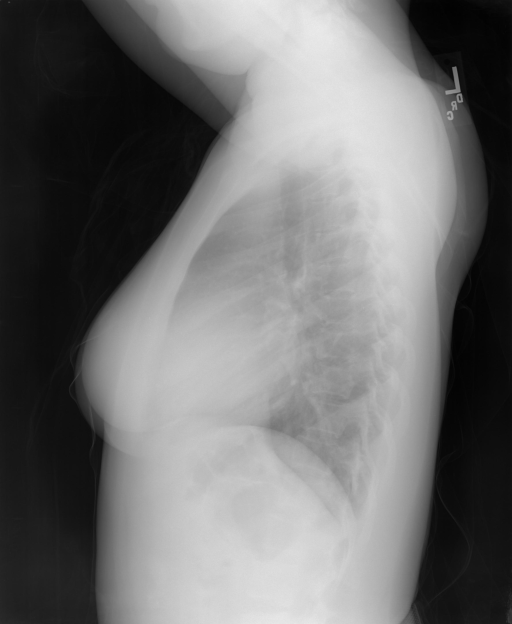

In [42]:
IPythonImage(filename='../images/CXR1_1_IM-0001-3001.png')

The above image is an image we might want to examine to see some of what we can do with the data. Let's start by checking the image size 

In [43]:
im = PILImage.open('../images/CXR1_1_IM-0001-3001.png', 'r')
im_array = np.asarray(im)

In [44]:
im_array.shape

(624, 512, 3)

What was that about? What is 624 or 3? Well we just opened the image, then made a variable of the arrays of numbers in the image. Once we did that we could use `.shape` to look at how many numbers were in the array. If you learned well from the first notebook you will remember that color PNG files have R, G and B channels. So that is the 3. Our image is 624 tall by 512 wide by 3 deep in terms of pixels. We could look at each pixel seperately. Let's try some examples.

In [45]:
im_array[0, 0, 0]  # pixel value first row, first column, first matrix in the stack

45

Let's check our idea that R, G and B channels are all the same. Let's look at some more values

In [46]:
im_array[0, 0, 1] 


45

In [47]:
im_array[0, 0, 2] 

45

Now let's look at the middle of the picture, if you think about it, the number here should be larger because the picture is white

In [48]:
im_array[0, 300, 0] 

221

OK, at this point if you have done my first code notebook, and this one up to here if there is one thing you understand it's that dealing with a digital image is dealing with numbers... let's start to look at these numbers a bit differently. Let's examine them with graphing and functions. Let's start with one single column

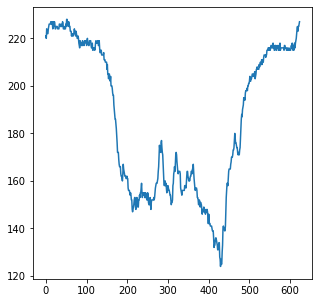

In [49]:
I = im_array[:, 300, 0]  # pixels along the column 300 on the first matrix (one channel)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
plt.plot(I)
plt.show()

So, above we used a function to plot the different values found in a single column. A single column does not represent much in terms of medicine. We are usually interested in organs and tissues which fall into discrete areas. But, we can and do use math to examine these as well. When we talk about texture we are talking about math, even if you are unaware of it, because we are talking about patterns in sets of numbers. Sometimes we can see the pattern. Sometimes the pattern is at a level beyond what a radiologists sees;  but a radiologist can still examine the quantitiative data. Radiomics is about just that: what the quantitative data in images can tell us.

Let's look at a few different images on a normal and radiomic level to watch math in action.

To keep things really simple, I'll make all my images from one single image.

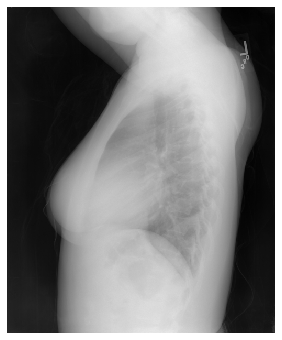

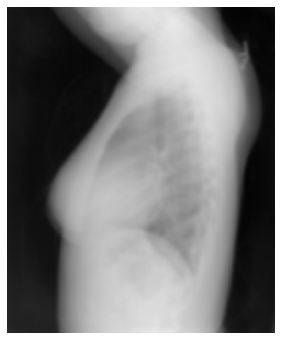

In [50]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
    plt.show()

show(np.asarray(im))

im_gauss = im.filter(ImageFilter.GaussianBlur(3))

show(im_gauss)

So, now we have two images we can work with: `im` and `im_gauss`. We know that one is sharper than the other. But can we show that in math? Let's look at a single column of each

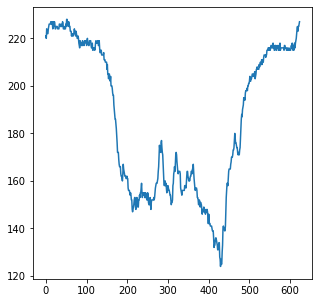

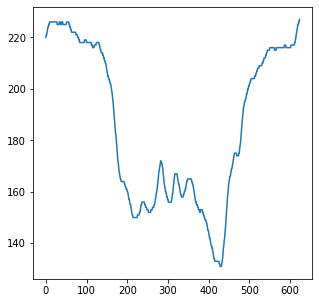

In [51]:
I = im_array[:, 300, 0]  # pixels along the column 300 on the first matrix (one channel) of im

fig = plt.figure(figsize=(5, 5))
plt.plot(I)
plt.show()
# now let's make an array of the second and make it's graph too
im_gauss_array = np.asarray(im_gauss)

I_gauss = im_gauss_array[:, 300, 0]

fig = plt.figure(figsize=(5, 5))
plt.plot(I_gauss)
plt.show()

Notice how the Gaussian image is smoother? That's because there is less variance in the numbers that are physically close to one another. Notice how the graphs have about the same shapes: of course because it is still more or less the same image, or sliver of an image in this case. Well, so what?--you might say--the graphs are just visualizations for us. We could just as easily use equations over whole images to get a sense of which is blurrier, and, voila, one group of functions for automating part of image quality control. 

Now let's use some math to make more different images. The math applied here uses filtering. The specific kind of filtering I'm going to be doing next is edge detection with two different algorithms. 

<Figure size 432x288 with 0 Axes>

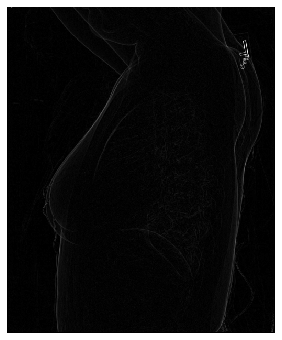

<Figure size 432x288 with 0 Axes>

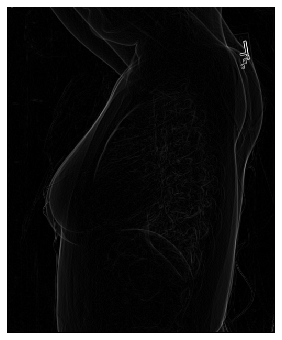

In [52]:
im_array_layer = im_array[:, :, 0]

from skimage.filters import roberts, sobel


edge_roberts = roberts(im_array_layer)
# plot_comparison(ima,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

edge_sobel = sobel(im_array_layer)
# plot_comparison(image,edge_sobel, 'Sobel edge detector')
show(edge_roberts)
plt.savefig('sobel_edges.png')
show(edge_sobel)

So, this brings us to the super-important concept of kernel. What is a kernel? Depends upon the context... but broadly in terms of image processing it's usually a matrix that is operating on another matrix (the second one of which is an image). Let's go through some very simplified operations with kernels. Of the two filters above, I think the Sobel is more interesing. Let's get into Sobel filtering for a second. 

The Sobel filter uses two $3\times 3$ kernels which are convolved with the image matrix to make two approximations of the derivatives – one for vertical changes, and the other for horizontal changes. That's linear algebra at work.

Let's look at the Sobel kernels:

$\begin{pmatrix}
–1	& 0 & +1 \\
–2	& 0	& +2 \\
–1	& 0	& +1
\end{pmatrix}$

And

$\begin{pmatrix}
+1 & +2 & +1 \\
0 & 0 & 0 \\
–1 & –2 & –1
\end{pmatrix}$

Do you notice how one is just like the other one turned on it's side?


Now you must have gathered that your computer did something with these two small matrices, or kernels, and your original image. What did it do? A kind of convolution. But let's not get too carried away in the technical details of linear algebra... let's get back to the big picture of radiomics and fun with the math of images in general. Let's show our four images, then guess what the numbers in column 300 look like, then look at graphs of column 300.

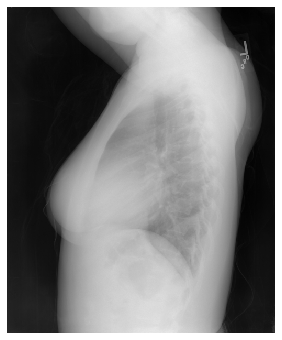

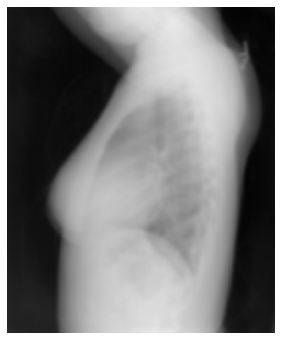

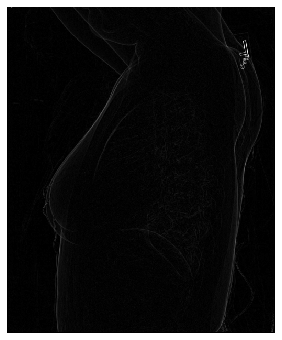

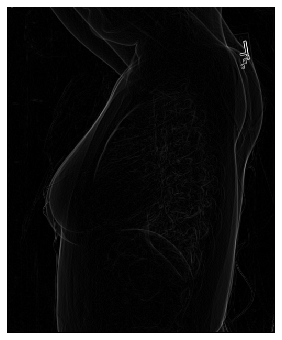

In [53]:
show(np.asarray(im))
show(im_gauss)
show(edge_roberts)
show(edge_sobel)

OK... now make your guesses (or in the first two cases, just remember) and here we go...

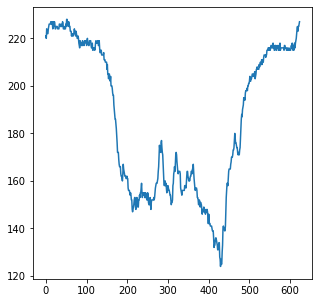

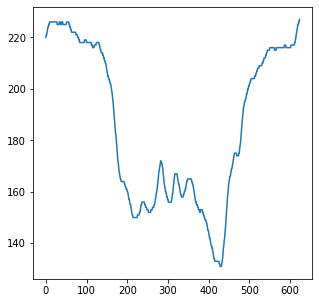

(624, 512)


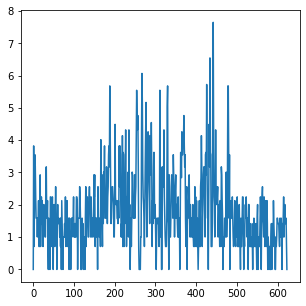

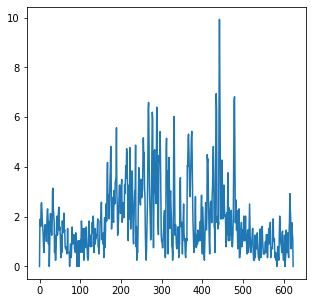

In [78]:
I = im_array[:, 300, 0]  # pixels along the column 300 on the first matrix (one channel) of im

fig = plt.figure(figsize=(5, 5))
plt.plot(I)
plt.show()
# now let's make an array of the second and make it's graph too
im_gauss_array = np.asarray(im_gauss)

I_gauss = im_gauss_array[:, 300, 0]

fig = plt.figure(figsize=(5, 5))
plt.plot(I_gauss)
plt.show()
print(edge_roberts.shape)
# now let's make an array of the third and make it's graph too

I_roberts = edge_roberts[:, 300]

fig = plt.figure(figsize=(5, 5))
plt.plot(I_roberts * 256)
plt.show()

# now let's make an array of the fourth and make it's graph too

I_sobel = edge_sobel[:, 300]

fig = plt.figure(figsize=(5, 5))
plt.plot(I_sobel * 256)
plt.show()

Was that what you expected? Think about the math for a second. First of all in the last two I multipled by 256, this just has to do with what the functions that made the images did to the numbers- I'm doing some normalization of the images. The numbers in the columns in the middle of the Sobel and Roberts filter are all pretty low- pretty close to black. If we move to a different place in these images there may be a bit more contrast. Lets check a different place, and check out maximum valued pixel in the sobel picture. If you change the number 490 you can look at diffent columns...but don't change upwards of 511, our image is 512 columns, and Python starts counting at zero. That means column #512 does not exist for Python. 

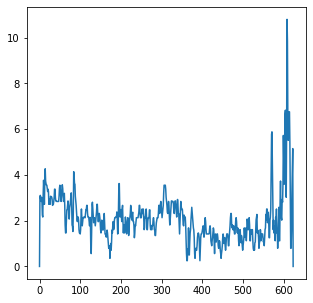

79.36458768101663


In [83]:
I_sobel = edge_sobel[:, 410]

fig = plt.figure(figsize=(5, 5))
plt.plot(I_sobel * 256)
plt.show()

print(edge_sobel.max() * 256)

So, our brightest pixel in the whole image was around 80. Now that we can understand something from simply the values in a matrix, it shouldn't be that hard to imagine that we can also get some interesting ideas when we see how the patterns and differences in numbers that are related to each other physically in the picture tell us something. That is the whole idea of texture analysis. In reality, when we have large images we can use a grey-level co-occurence matrix; however we need to understand the math before we just start throwing functions on huge matrices around.

To really understand this on a deep level, we can visualize what we are doing with some small matrices. Go ahead and create a 6 by 6 matrix. Do you remember how? I'll put one there, but I want you to play with the numbers.

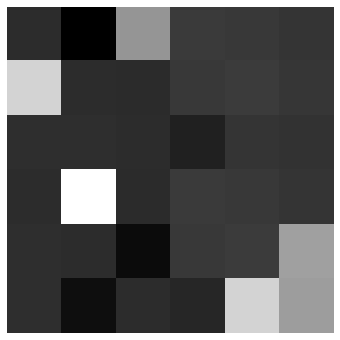

In [58]:
matrix_one = [[43, 0, 141, 55, 53, 50],
              [200, 43 ,41, 54 ,56, 51],
              [44 ,44 ,42 ,32 ,49 ,48],
              [43 ,241 ,41 ,55 ,53 ,50],
              [44 ,43 ,11 ,54 ,56 ,151],
              [44 ,14 ,42, 36 ,200, 148]]
show(matrix_one)

You can play with the numbers by hand to make any matrix you want in the upcoming step, but the goal will now be to do an analysis of the matrix. Let's ask some mathematical questions you may have never appreciated were mathematical. How much contrast does my matrix have? How homogenous is my matrix? If this seems very esoteric, remember these mathematical properties have a meaning: they might statistically correlate with how well a cancer will respond to therapy... they definitely will correlate in the case of a chest Xray to some important isssues (that pneumothorax should be a low contrast area which is homogenously blackish, for example).

So let's ask the question about contrast. What does contrast mean? Well, it means that some of the pixels are numerically (and visually) far away from some of the other pixels in value. So if I pair up the pixels and start subtracting between the pairs the diffferences should be large. If I have a totally homogenous matrix, all the differences should be zero. There are many precise ways to express these questions with mathematical languages... these precise ways invariably involve a big sigma sign ($\sum$), other mathematical notation and a lot of variables. Do not be intimidated by the equasions. I won't even put any intimidating equasions here. I find they make people who do not (yet?) like mathemtatics simply want to give up. 

Let's play in a matrix, and just think about the numbers! I'll start it as a matrix with no differnces between the numbers

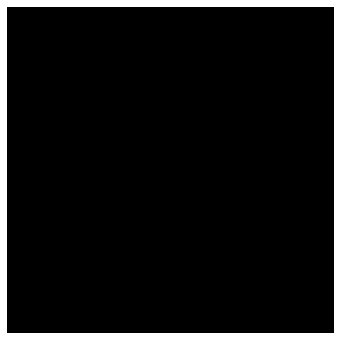

In [59]:
mymatrix = [[40, 40, 40, 40, 40, 40],
            [40, 40, 40, 40, 40, 40],
            [40, 40, 40, 40, 40, 40],
            [40, 40, 40, 40, 40, 40],
            [40, 40, 40, 40, 40, 40],
            [40, 40, 40, 40, 40, 40]]
show(mymatrix)

So you can now understand conceptually, even if you don't understand mathematical notation, what texture analysis is all about. It shouldn't be a leap to see that we can use math to ask questions like "is there a repeating pattern in these numbers, like say stripes or polka dots?" That's more texture analysis. A good mathematician can take any work you would use to describe texture, and turn it into math. 

Coding for texture analysis is quite interestng. If you want to use some pre-made code I invite you to use the opensource work I created- so long as you credit me. You can find it on my Github (https://github.com/drcandacemakedamoore). Check out the programs image-marker and neuromath. But coding your own texture analysis programs can be quite interesting. I'll give some suggestions. First you probably want to read on what a grey level co-occurence matrix is. I'll put an idea to start the code below in the next box. Have fun, and code on!

In [ ]:
from skimage.feature import greycomatrix, greycoprops